# Degiti Recognizer (MNIST data)
*Mona Vahdat*

# Part 1

* Preprocess the data.
* Visualize one element from each class.
* Visualize the mean of each class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# This is the downloaded CSV file. Load it in.
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")
mnist_df = pd.DataFrame(mnist_csv)
# Split into features and target
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [3]:
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [4]:
mnist_df.shape 

(35000, 785)

In [5]:
np.isnan(mnist_csv).sum() # there is no NAN value in our dataset

0

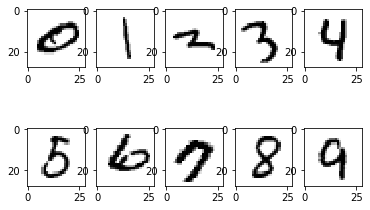

In [6]:
for i in range(10):
    df = mnist_df.loc[mnist_df[784] == i]
    img = df.iloc[0,:-1].values.reshape(28,28)
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray_r')


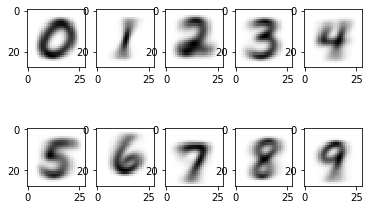

In [7]:
for i in range(10):
    df = mnist_df.loc[mnist_df[784] == i]
    df = df.iloc[:, :-1]
    img = df.mean().values.reshape(28,28)
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray_r')

# Part 2

## Fit a logistic regression model to this data with its solver set to be the 'lbfgs' algorithm.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000, penalty='l2')
lr_model.fit(X_train, y_train)

train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)

print("The accuracy on the training data points with logistic regression ", train_score)
print("The accuracy on the training data points with logistic regression ", test_score)

The accuracy on the training data points with logistic regression  0.9748095238095238
The accuracy on the training data points with logistic regression  0.8716428571428572


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Reduction of Dimensionality
>Reduce the dimensionality of your data using Principal Component Analysis.

In [10]:
from sklearn.decomposition import PCA

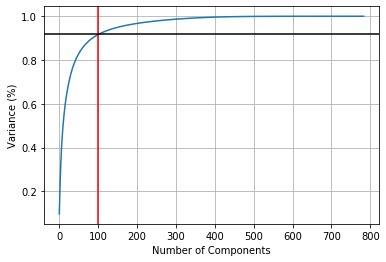

In [11]:
#Fitting the PCA algorithm with our Data
pca_model = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.axvline(x=100, c = 'red')
plt.axhline(y=0.92, c = 'black')
plt.grid()
plt.show()


>This plot shows that with selecting 100 components, we can get more than 90% of the total variance of the training data. We want only the more important ones because if we use 100% of our variance, it shows all components. So, we are going to set our components by 300.

In [12]:
pca_model = PCA(n_components = 100).fit(X_train)
X_train_new = pca_model.transform(X_train)
X_test_new = pca_model.transform(X_test)

> Now we train our model with logistic regression again using new train and test data points which are trained with PCA:

In [13]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000, penalty='l2')

lr_model.fit(X_train_new, y_train)

train_score = lr_model.score(X_train_new, y_train)
test_score = lr_model.score(X_test_new, y_test)

print("The accuracy on the training data points with logistic regression using PCA", train_score)
print("The accuracy on the testing data points with logistic regression using PCA", test_score)

The accuracy on the training data points with logistic regression using PCA 0.926047619047619
The accuracy on the testing data points with logistic regression using PCA 0.9117857142857143


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Computation Time
>What does reducing the dimensionality do to the computation time and why? What does reducing the number of data points do to the computation time and why?

> To come up with this question first let's have some different values for our components randomly, then see the ralation between computation timing and the number of components:

In [14]:
import time

In [15]:
components = [1, 50, 100, 200, 300, 400, 500, 600, 700]
total_time = []
train_accuracy = []
test_accuracy = []

for component in components:
    pca_model = PCA(n_components = component).fit(X_train)
    X_train_new = pca_model.transform(X_train)
    X_test_new = pca_model.transform(X_test)

    start_time = time.time()
    lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000, penalty='l2')

    lr_model.fit(X_train_new, y_train)

    end_time = time.time()
    total_time.append(end_time - start_time) 
    train_accuracy.append(lr_model.score(X_train_new, y_train))
    test_accuracy.append(lr_model.score(X_test_new, y_test))
    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

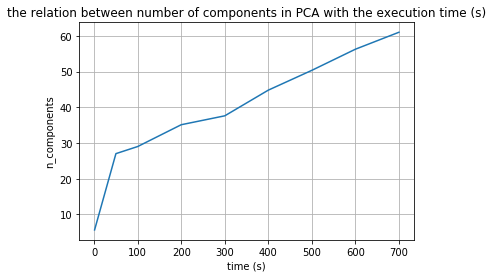

In [16]:
plt.figure()
plt.plot(components, total_time)
plt.title('the relation between number of components in PCA with the execution time (s)')
plt.xlabel('time (s)')
plt.ylabel('n_components')
plt.grid()
plt.show()

>From above, we can see by decreasing the dimnesional of the dataset, we saw a decreament in the computation time. But, we should consider that by reducing the range of our training data points, we may loose some other data points that may had been not outliers. So, as a result it may affect our model in terms of the accuracy. Now, let's see what is the relation between the number components and the accuracy:

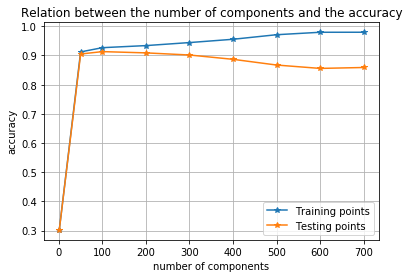

In [17]:
plt.figure()
plt.plot(components, train_accuracy, label = 'Training points', marker = '*')
plt.plot(components, test_accuracy, label = 'Testing points', marker = '*')
plt.title('Relation between the number of components and the accuracy')
plt.xlabel('number of components')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

> We can see from above that by increasing the numebr of components, we get more in accuracy. As we found that with having 100 components for training our model using PCA we get the mostly better accuracy, we can say that this graph illustrates the same thing that we concluded.

> Now let's look at the relation between the amount of data points and the computation time. To do this, we are going to split our training data points in some different sizes from 10% to 90% of the data points.

In [18]:
size_of_training_data_points = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
total_time = []
total_size = []
train_accuracy = []
test_accuracy = []

for size in size_of_training_data_points:
# reduce the amount of data points (rows)
    i = int(X.shape[0] * size) 
    X_new = mnist_csv[:i, :-1]
    y_new = mnist_csv[:i, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.4, stratify = y_new)


    pca_model = PCA(n_components = 100).fit(X_train)
    X_train_new = pca_model.transform(X_train)
    X_test_new = pca_model.transform(X_test)
    
    start_time = time.time()
    lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000, penalty='l2')

    lr_model.fit(X_train_new, y_train)

    end_time = time.time()
    train_accuracy.append(lr_model.score(X_train_new, y_train))
    test_accuracy.append(lr_model.score(X_test_new, y_test))
    total_time.append(end_time - start_time) 
    total_size.append(i)



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

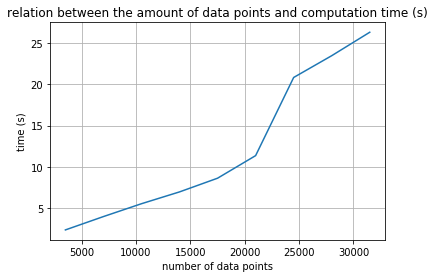

In [19]:
plt.figure()
plt.plot(total_size, total_time)
plt.title('relation between the amount of data points and computation time (s)')
plt.xlabel('number of data points')
plt.ylabel('time (s)')
plt.grid()
plt.show()

>The graph above shows by decreasing the number of data points, the computation time decreased too, that is expected because the more data points, the more time take to fit the model. But, we should consider that by reducing the number of data points we are going to decrease the precesion of our model due to having a smaller training data points. Let's see what is the relation between the number of data points and the accuracy:

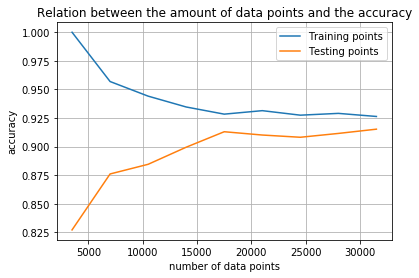

In [20]:
plt.figure()
plt.plot(total_size, train_accuracy, label = 'Training points')
plt.plot(total_size, test_accuracy, label = 'Testing points')
plt.title('Relation between the amount of data points and the accuracy')
plt.xlabel('number of data points')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

> As we can see above, while with having lower data points the accuracy of training model is going up, the accuracy of testing model is going down so we can say that by having from 5000 to around 17000 of data points, we don't get a good accuracy. In this range, our model may become overfit or underfit.

## c)  Pros and Cons
List one advantage and disadvantage of reducing dimensionality. List one advantage and disadvantage of reducing the number of data points.

>By reducing dimensionality, computation time will decrease, but in terms of the amount of n_component we see the different amount in accuracy.

>We saw that by decreasing the amount of data points, computation time has reduced. But, if we are going to have data points below the specific amount, our model may become overfit or underfit.

# Part 3

## KNN  Classifier
>Train two KNN classifiers to model the data: one where K=1 and one where K=the number of training points. For each model, evaluate its accuracy on the training set and on the test set.

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

> First, we are trying to fit the model and test some different K value on 10 percent of the total data points (3500 data points instead 35000) to see the differences, because it may take a long time to fit the total number of data points. So, our X and y would change:

In [22]:
X_new = mnist_csv[:3499, :-1]
y_new = mnist_csv[:3499, -1]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.4, stratify = y_new)

> We are going to set the K to 1 and see the results:

In [23]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)
train_score = knn_model.score(X_train, y_train)
test_score = knn_model.score(X_test, y_test)

print("The accuracy of the train score with 10% of data points and k = 1: ", train_score)
print("The accuracy of the test score with 10% of data points and k = 1: ", test_score)

The accuracy of the train score with 10% of data points and k = 1:  1.0
The accuracy of the test score with 10% of data points and k = 1:  0.9178571428571428


In [24]:
knn_model = KNeighborsClassifier(n_neighbors = len(y_train))
knn_model.fit(X_train, y_train)
train_score = knn_model.score(X_train, y_train)
test_score = knn_model.score(X_test, y_test)

print("The accuracy of the train score with 10% of data points and k = the number of training points: ", train_score)
print("The accuracy of the test score with 10% of data points and k = the number of training points: ", test_score)

The accuracy of the train score with 10% of data points and k = the number of training points:  0.10862315388280133
The accuracy of the test score with 10% of data points and k = the number of training points:  0.10857142857142857


> As we can see above from the results, the accuracy of training model when k = 1 is 100% which is expected, and the accuracy of test model is pretty good which is almost 90%, but this scenario for the model with having the number of training points for k, is really bad we have 10% of accuracy. This was expected, because the model trying to find all distances from a point to all the data points so the accuracy would get low. 

##  The best K
>Based on your results from Question 3a, try to find an ideal number of neighbors for your KNN classifier. For each value of K that you explore, evaluate the accuracy of the model on the training set and on the test set. What seems to be an ideal value for K, and why is it ideal? (Note: This will take a long time computationally.

>>Before going to choose the best K value, we are going to test some random value for K and see the accuracy of both train and test to get an idea that what happend if we have high value for K in KNN model. Before, we saw that by setting the K value to the number of training points, we got low accuracy.

In [25]:
neighbors = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 950, 1000]
trains = []
tests = []

for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    trains.append(knn_model.score(X_train, y_train))
    tests.append(knn_model.score(X_test, y_test))
    print(k, end = '\r')
df = pd.DataFrame({'k': neighbors,
              'Training Accuracy': trains,
              'Test Accuracy': tests})
df.head(20)

,k,Training Accuracy,Test Accuracy
0,10,0.912339,0.898571
1,50,0.846594,0.844286
2,100,0.787994,0.787143
3,150,0.745593,0.745000
4,200,0.707956,0.722143
5,250,0.671272,0.691429
6,300,0.656503,0.667857
7,350,0.629347,0.645714
8,400,0.608385,0.627857
9,450,0.588375,0.585714


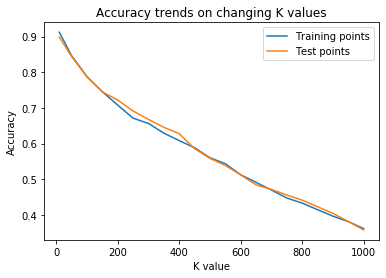

In [26]:
plt.figure()
plt.title('Accuracy trends on changing K values')
plt.plot(df['k'], df['Training Accuracy'], label = 'Training points')
plt.plot(df['k'], df['Test Accuracy'], label = 'Test points')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

> By looking at the line graph above, we can see that the trends of training and testing points are similar which is great. Also, by increasing the number of neighbors the accuracy is getting worst. We can say that by defining our KNN model with 10 neighbors, we can get the best accuracy on both training and testing points. 

## Desicion Tree
>Build another model to predict which digit is written, this time using a decision tree. Instead of controlling for the K-value, control for the depth of the tree. Document your model-fitting and model-evaluation process clearly.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
acc_train = []
acc_test = []
max_depth = list(range(1,50))

for n in max_depth:
    tree_model = DecisionTreeClassifier(max_depth=n)
    tree_model.fit(X_train, y_train)
    acc_train.append(tree_model.score(X_train, y_train))
    acc_test.append(tree_model.score(X_test, y_test))
    
df = pd.DataFrame({'Max Depth': max_depth,
                   'Training Accuracy': acc_train,
                   'Test Accuracy': acc_test})
df.head(50)

,Max Depth,Training Accuracy,Test Accuracy
0,1,0.202954,0.199286
1,2,0.328252,0.320714
2,3,0.470700,0.445000
3,4,0.637446,0.606429
4,5,0.728442,0.662143
5,6,0.788947,0.690714
6,7,0.850405,0.705714
7,8,0.906146,0.711429
8,9,0.948547,0.705000
9,10,0.978085,0.705714


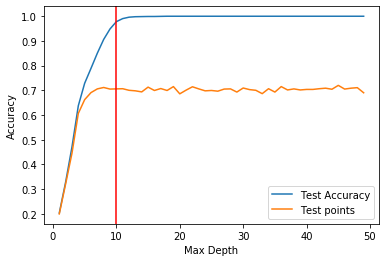

In [29]:
plt.figure()
plt.plot(df['Max Depth'], df['Training Accuracy'], label = 'Test Accuracy')
plt.plot(df['Max Depth'], df['Test Accuracy'], label = 'Test points')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.axvline(x=10, c = 'red')
plt.show()

> By looking at the line graph above, we can see that at the point that we have our max depth at 10, test accuracy were starting to be in the highest accuracy. Also, test accuracy is going up. At this point we have the highest accuracy on testing points.


# Part 4

## 5-fold Cross-validation
>Fit a logistic regression model and use 5-fold cross-validation to optimize its hyperparameters. For each hyperparameter that you’re tuning, describe what it controls in your model. What are the optimal hyperparameters that you found?

>>First, using some different values for 'c' hyperparameter to find the optimized one.

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
#Store the results
cross_validation_scores = []
C_range = [.00001,.0001,.001,.1, 1,10,100,1000,10000]

#Do some cross validation
for c in C_range:
    lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000, penalty='l2',
                                  C=c,random_state=1)
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

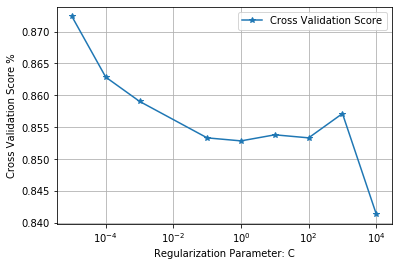

The best model has C =  1e-05


In [32]:
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='*')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score %')
plt.grid()
plt.show()
which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

>>From the line graph above, we can see that the best value for the C parameter is 0.00001 where we have more accuracy in logistic regression using cross validation. Now, with this C we are going to use l1 as a penalty to have a comparison between l1 and l2 to come up with the best penalty for this model.

In [33]:
lr_model = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1', C = 0.00001)
cv_score_training = np.mean(cross_val_score(lr_model, X_train, y_train, cv = 5))
cv_score_testing = np.mean(cross_val_score(lr_model, X_test, y_test, cv = 5))

print('The tarining accuracy of the logistic regression 5-fold cross-validation model using l1 with C =  0.00001 as a penalty is: ', cv_score_training)
print('The testing accuracy of the logistic regression model using 5-fold cross-validation using l1 with C = 0.00001 as a penalty is: ', cv_score_testing)

The tarining accuracy of the logistic regression 5-fold cross-validation model using l1 with C =  0.00001 as a penalty is:  0.2429226527311421
The testing accuracy of the logistic regression model using 5-fold cross-validation using l1 with C = 0.00001 as a penalty is:  0.09499449508241883


In [34]:
lr_model = LogisticRegression(solver='lbfgs', penalty='l2', C = 0.00001, max_iter = 1000, random_state=1)
cv_score_training = np.mean(cross_val_score(lr_model, X_train, y_train, cv = 5))
cv_score_testing = np.mean(cross_val_score(lr_model, X_test, y_test, cv = 5))

print('The tarining accuracy of the logistic regression 5-fold cross-validation model using l2 with C =  0.00001 as a penalty is: ', cv_score_training)
print('The testing accuracy of the logistic regression model using 5-fold cross-validation using l2 with C = 0.00001 as a penalty is: ', cv_score_testing)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-package

The tarining accuracy of the logistic regression 5-fold cross-validation model using l2 with C =  0.00001 as a penalty is:  0.8647490715791495
The testing accuracy of the logistic regression model using 5-fold cross-validation using l2 with C = 0.00001 as a penalty is:  0.877955959501129


> >The testing accuracy of the model using l2 as a penalty is pretty better than l1. Which means that we can have a more optimized model using l2 penalty and having C with 0.00001.

## Confusion Matrix
>What does the confusion matrix look like for your best model?

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

co_matrix = confusion_matrix(y_test, y_pred)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


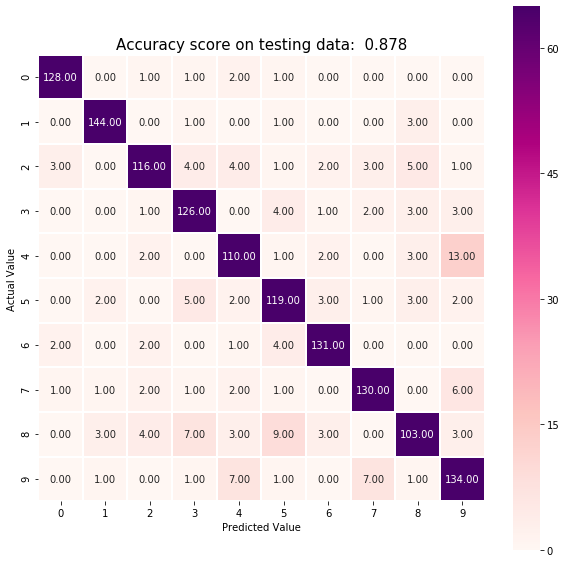

In [37]:
plt.figure(figsize = (10, 10));
ax = sns.heatmap(co_matrix, annot = True, fmt = '.2f', vmax = 65, linewidths = 1, square = True, cmap = 'RdPu');
plt.xlabel('Predicted Value');
plt.ylabel('Actual Value');
plt.title(f"Accuracy score on testing data: {cv_score_testing : 0.3}", size = 15)
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top - 0.5);

>In heatmap, y axis shows the actual labels and x axis shows the predicted labels. The diagonal tells us the number of each labels (from 0 to 9) that correctly predicted. Most 1s are predicted correctly than the other numbers. Three pairs of numbers are predicted most wrongly which are 4s and 9s, 3s and 5s, and 7s and 9s.
It seems that 9s are most difficult to predict.

# Re-fit a linear model that can discriminate between the digit 4 and the digit 9

 >To fit the model on 4s and 9s, we need a dataset consists of just 4s and 9s. We are going to make a new dataframe, and define our classes and features (new X and y):

In [38]:
mnist_df_4s = mnist_df[mnist_df[784] == 4.0]
mnist_df_9s = mnist_df[mnist_df[784] == 9.0]

In [39]:
mnist_df_4s9s = mnist_df_4s.append(mnist_df_9s)

In [40]:
mnist_4s9s = mnist_df_4s9s.values

In [41]:
X4s9s = mnist_4s9s[:, :-1]
y4s9s = mnist_4s9s[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X4s9s, y4s9s, test_size=0.4, stratify = y4s9s)

In [42]:
lr_model_4s9s = LogisticRegression(solver='lbfgs', penalty='l2', C = 0.00001, random_state=1)
lr_model_4s9s = lr_model_4s9s.fit(X_train, y_train)

# We do not really care about the accuracy of this model, but just in case:
print('Accuracy score on training data:', lr_model_4s9s.score(X_train, y_train))
print('Accuracy score on testing data:', lr_model_4s9s.score(X_test, y_test))

Accuracy score on training data: 0.9791059280855199
Accuracy score on testing data: 0.967930029154519


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


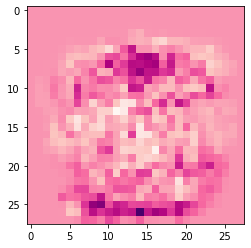

In [43]:
plt.imshow(lr_model_4s9s.coef_.reshape(28,28), cmap='RdPu')

> In the picture above, the darker area shows the higher value for coefficients of our model. It seems that these areas have more effect to distinguish 9s and 4s (above-centre and bottom of the 4s and 9s).